In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
_include_('curriculum_vqa')
import sys
import os
from cvqa import datasets, models, trainers, viz

data_bin = f'{DEV_HOME}/curriculum_vqa/data-bin'
clevr_root = f'{data_bin}/CLEVR_mini_6'

In [3]:
ds_train, ds_dev = datasets.CLEVR.load_train_dev(clevr_root, struct_viz=True)

100%|██████████| 3600/3600 [00:01<00:00, 2224.87it/s]


In [6]:
import torch
from cvqa.model_dev.lstms import Seq2SeqLSTM

trainer = trainers.VQATrainer(pred_target='target_program_out', ignore_index=ds_train.vocab.pad_index)

model_args = Seq2SeqLSTM.args(ds_train.vocab, ds_train.programs_vocab)
model = Seq2SeqLSTM(model_args)
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

train_metrics = trainer.train(model, ds_train, ds_dev, optimizer, num_epochs=5)

[epoch=0, steps=93, train_acc=0.00, dev_acc=0.00] loss: 2.064: 100%|██████████| 94/94 [00:02<00:00, 39.97it/s]
[epoch=1, steps=125, train_acc=0.36, dev_acc=0.36] loss: 0.687: 100%|██████████| 94/94 [00:02<00:00, 38.72it/s]
[epoch=2, steps=157, train_acc=0.64, dev_acc=0.64] loss: 0.449: 100%|██████████| 94/94 [00:02<00:00, 41.75it/s]
[epoch=3, steps=189, train_acc=0.67, dev_acc=0.66] loss: 0.356: 100%|██████████| 94/94 [00:02<00:00, 36.30it/s]
[epoch=4, steps=221, train_acc=0.78, dev_acc=0.77] loss: 0.291: 100%|██████████| 94/94 [00:02<00:00, 34.24it/s]


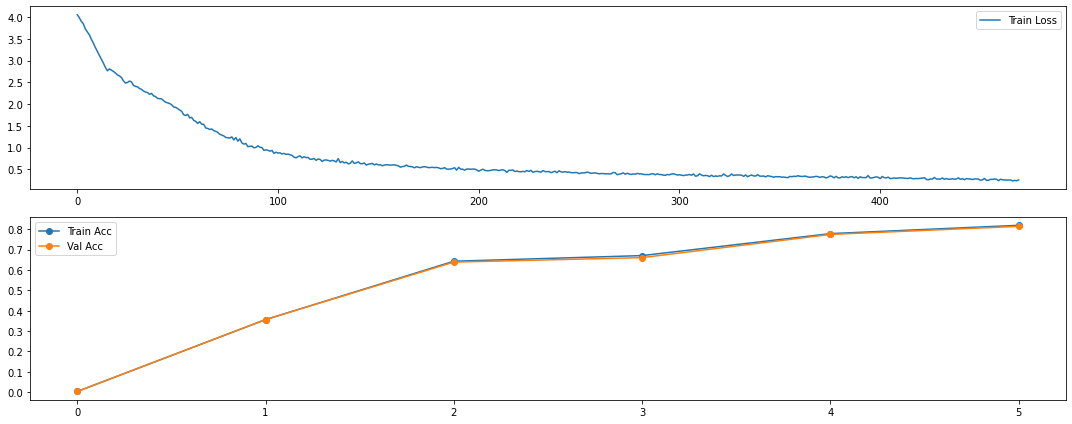

In [9]:
viz.plot_training(*train_metrics)

In [27]:
ds_dev.debug_mode = True
s = next(iter(torch.utils.data.DataLoader(ds_dev, shuffle=True)))

logits, y_pred = model.forward_test(s)

In [28]:
prog_vocab = ds_train.programs_vocab

y_pred

tensor([[21,  5,  6,  5,  7,  8, 14,  5, 35,  7,  8, 18,  5, 19,  7,  8, 11,  5,
          7,  7,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1]])

In [29]:
prog_vocab.string(y_pred)

"query_size ( scene ( ) . filter_color ( 'blue' ) . filter_shape ( 'cylinder' ) . unique ( ) ) <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>"

In [30]:
s['prompt_text']

['What is the size of the purple rubber object?']

In [31]:
s['program_str']

["query_size(scene().filter_color('purple').filter_material('rubber').unique())"]